# California Statewide Crop Mapping Datasets
Related links:
* For the documentation about these datasets, their source, how to download them, and the features of interest, please refer to our [Crops Datasets](doc/assets/crops.md) documentation
* For the explanations on how the crom mapping datasets are overlaid with township boundaries to obtain the amount of land used for each crop type in each township, please refer to our [Overlaying San Joaquin Valley Township Boundaries](doc/etl/township_overlay.md) documentation

__WARNING:__ The Crops datasets are made of ten of thousands of small fields. When overlaying the TRS Township boundaries on the Crops geospatial data it takes a lot of time to cut the fields and group them by Township boundaries.


In [1]:
import matplotlib.pyplot as plt
from lib.crops import CropsDataset

Load the data by instantiating the CropsDataset class based on
* the geospatial map data for the years 2014, 2016 and 2018,
* the soil CSV dataset and the GeoJSON map data of the San Joaquin Valley

In [2]:
crops_dataset = CropsDataset()

Pre-process the crops dataset to keep only the selected features for the final analysis.

In [3]:
crops_dataset.preprocess_map_df()

In [4]:
crops_dataset.map_df

,YEAR,CROP_TYPE,geometry
0,2016,C,"MULTIPOLYGON (((-122.30403 37.12502, -122.3040..."
1,2016,D,"MULTIPOLYGON (((-122.88144 38.25519, -122.8805..."
2,2016,F,"MULTIPOLYGON (((-122.12529 36.97312, -122.1254..."
3,2016,G,"MULTIPOLYGON (((-122.93828 38.11983, -122.9384..."
4,2016,I,"MULTIPOLYGON (((-124.14684 40.56619, -124.1469..."
5,2016,NR,"MULTIPOLYGON (((-122.06906 38.05274, -122.0690..."
6,2016,P,"MULTIPOLYGON (((-124.24992 40.28151, -124.2499..."
7,2016,R,"MULTIPOLYGON (((-122.89315 39.13330, -122.8930..."
8,2016,T,"MULTIPOLYGON (((-122.49438 37.50421, -122.4944..."
9,2016,U,"MULTIPOLYGON (((-122.90116 38.24597, -122.9007..."


Overlay the San Joaquin Valley township boundaries on the Crops dataset to cut the crops land areas with the township boundaries, thus extracting all the crops types per townships.

In [5]:
crops_dataset.overlay_township_boundries()

Display the map of the 2018 Crops dataset

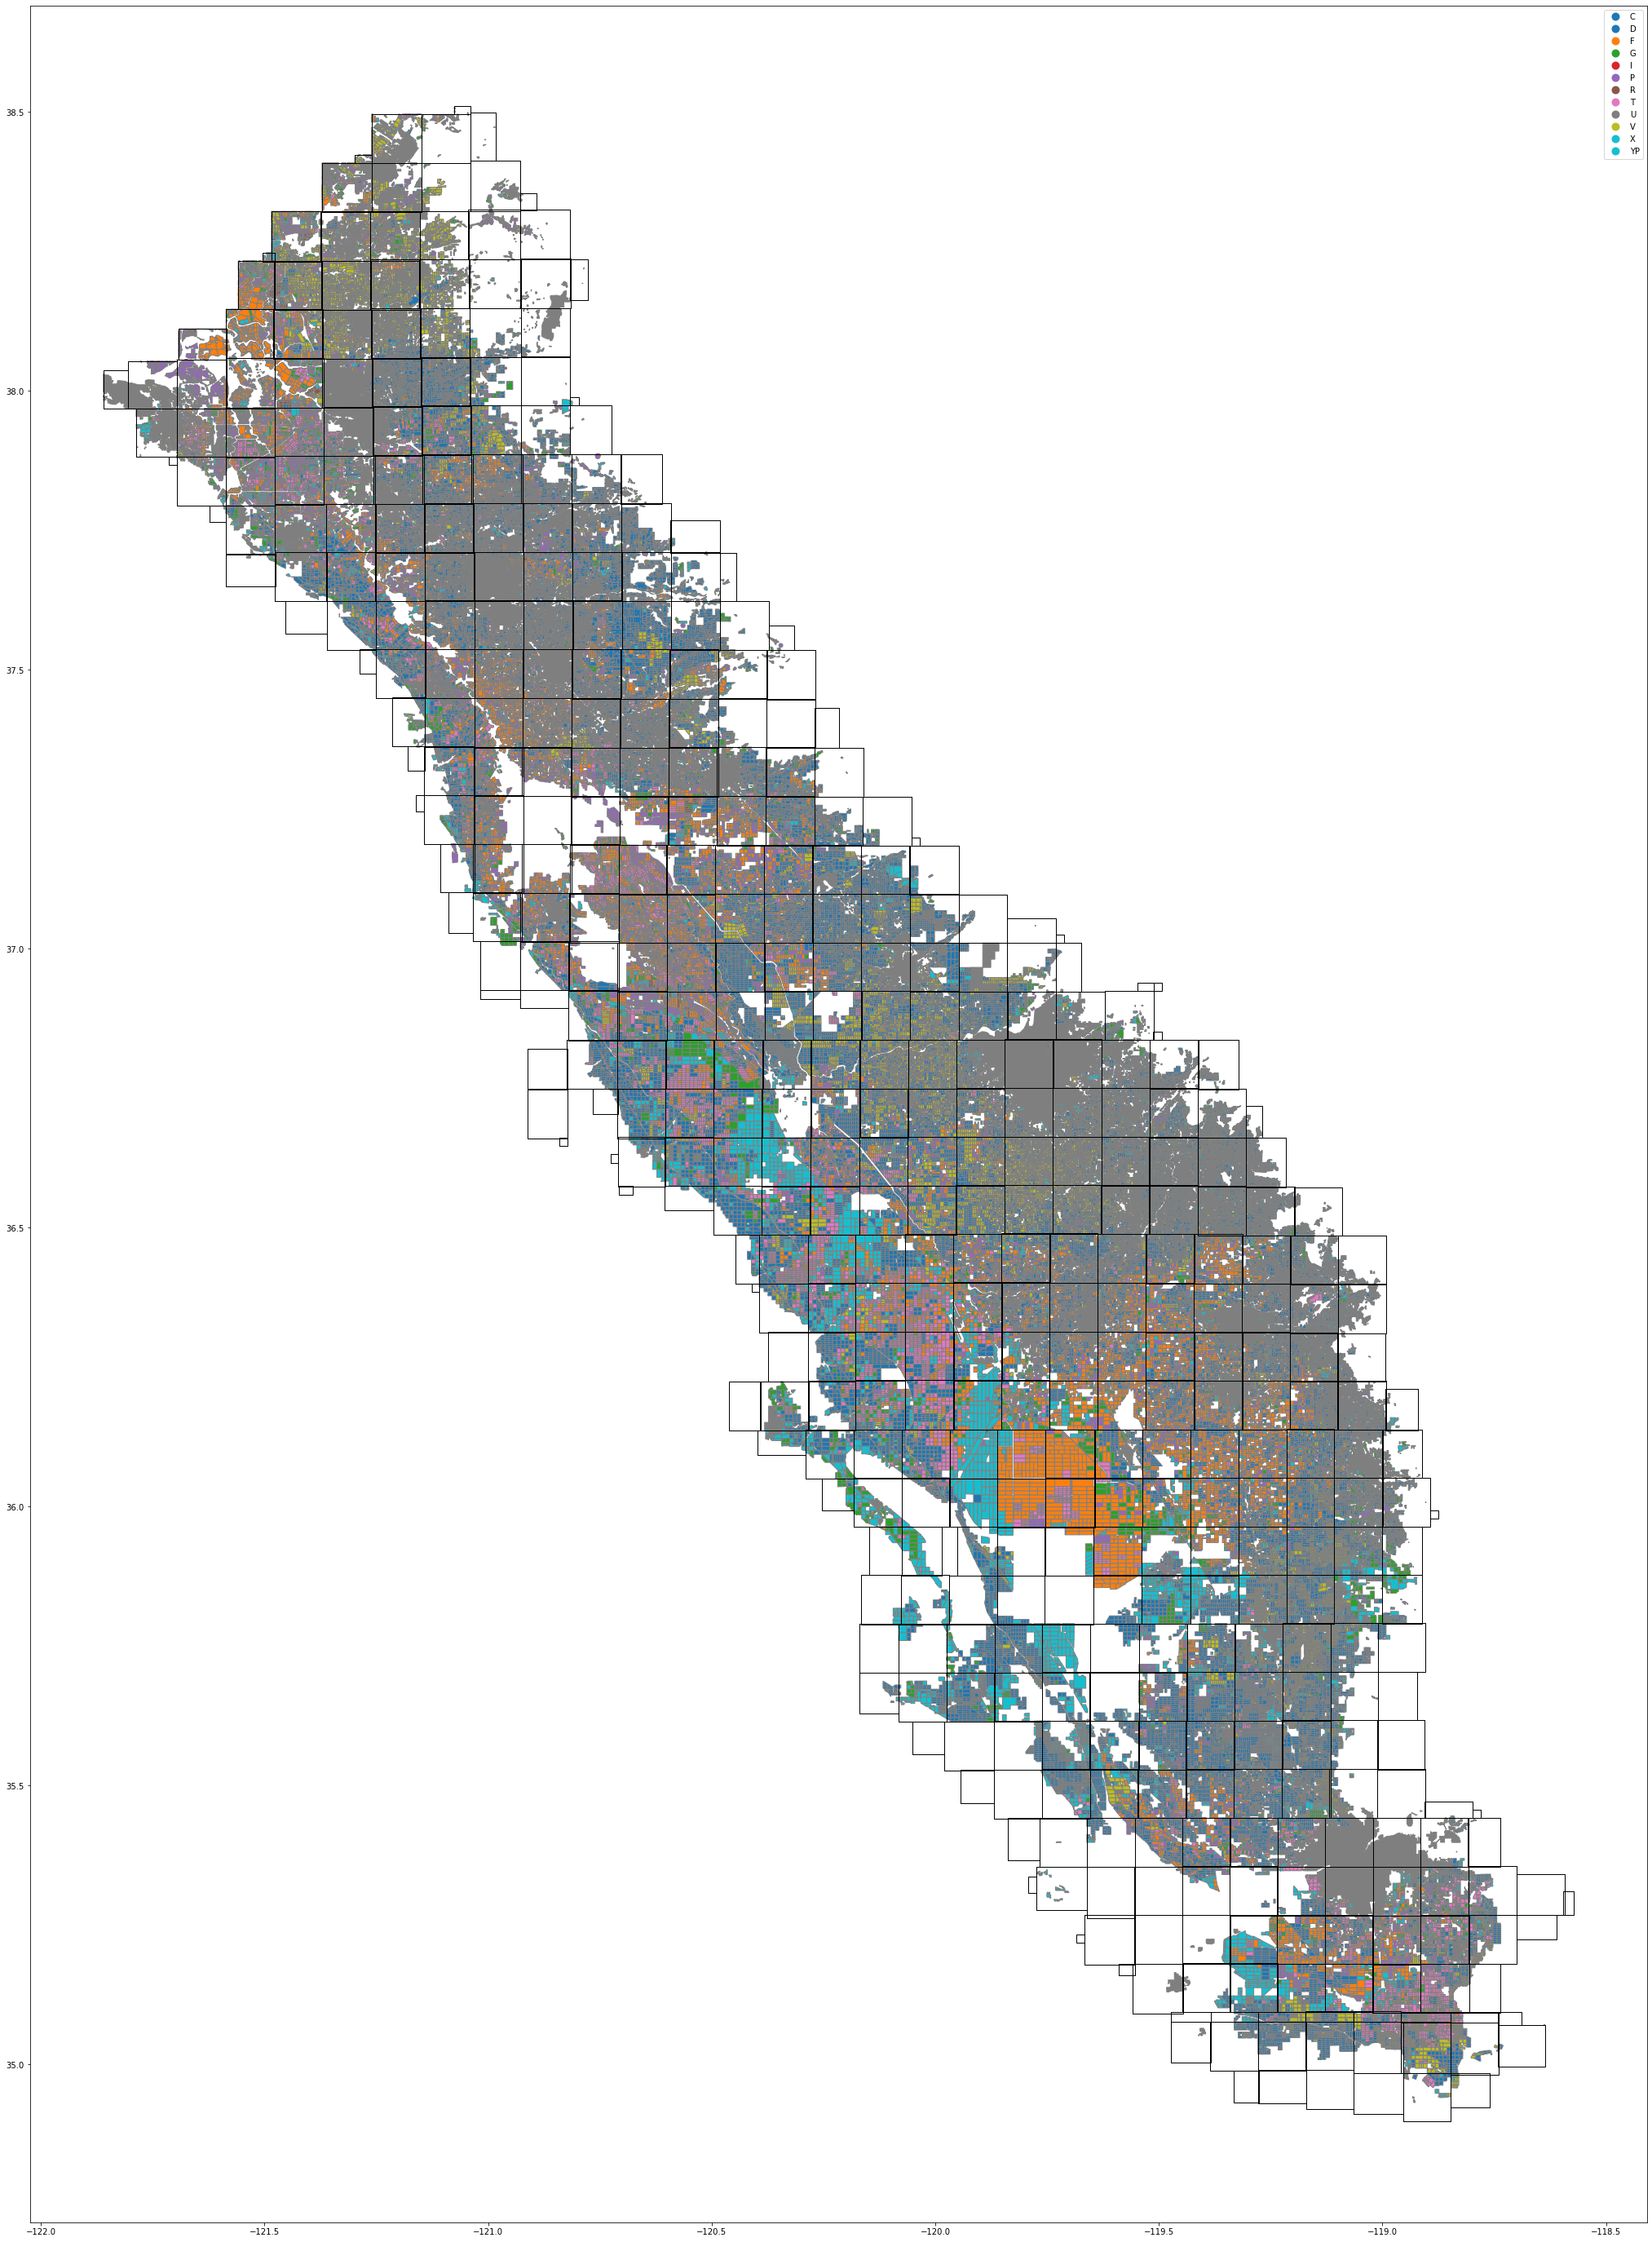

In [6]:
fig, ax = plt.subplots(figsize=(50,50))
crops_dataset.map_df[crops_dataset.map_df["YEAR"]=="2018"].plot(ax=ax, column="CROP_TYPE", edgecolor='grey', linewidth = 1, cmap=None, legend=True)
crops_dataset.sjv_township_range_df.plot(ax=ax, facecolor="none", edgecolor='black', linewidth = 1, cmap=None, legend=None)
plt.show()

The Crops datasets is further modified as follow:
1. Missing townships are filled with the "X - Unclassified" class from the Crops datasets to inlude them in the dataset.
2. Data for the year 2014 are used to fill the 2015 data, the 2016 for 2017 and the 2018 for the years 2019~.
3. The dataframe is then pivoted so that each `CROP_TYPE`becomes a feature
4. features matching the below criteria are dropped:
    * cover less than 5% of the land surface of every township for any given year
    * and `["X - Not Classified", "U - Urban", "NR - Native Riparian"]` classes are dropped

Note that the result of 1 and 4 is that the missing Township-Ranges will then be in the dataset with a land surface value of `0? for every type of crop.

In [7]:
crops_dataset.fill_missing_years()
crops_dataset.fill_townships_with_no_data()
crops_dataset.compute_feature_at_township_level("CROP_TYPE")
crops_dataset.drop_features(drop_rate=0.05, unwanted_features=["X", "U", "NR"])

D:\code\jupyter_nb_data\UMSI\milestone2_waterwells_deepnote\lib\wsdatasets.py:187: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.map_df["AREA"] = self.map_df.geometry.to_crs(epsg=4326).area


In [ ]:
crops_dataset.output_df

In [9]:
crops_dataset.output_df.to_csv("../assets/outputs/crops.csv")